In [78]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

In [86]:
num_values = 100
estimated_distances=np.linspace(0,100,num=num_values)

In [87]:
fraction = 0.25
def calculate_coefficients(estimated_distance, stereo_max_distance):
    if estimated_distance < (1-fraction)*stereo_max_distance:
        k_size = 0.0
        k_stereo = 1.0
    elif estimated_distance > (1+fraction)*stereo_max_distance:
        k_size = 1.0
        k_stereo = 0.0
    else:
        l1 = estimated_distance - (1-fraction)*stereo_max_distance
        l2 = (1+fraction)*stereo_max_distance - (1-fraction)*stereo_max_distance
        k_size = l1/l2
        k_stereo = 1 - k_size
    return k_stereo, k_size

In [93]:
k_stereo = np.zeros((num_values,1))
k_size = np.zeros((num_values,1))
for i in range(num_values):
    k_stereo[i], k_size[i] = calculate_coefficients(estimated_distances[i], stereo_max_distance)

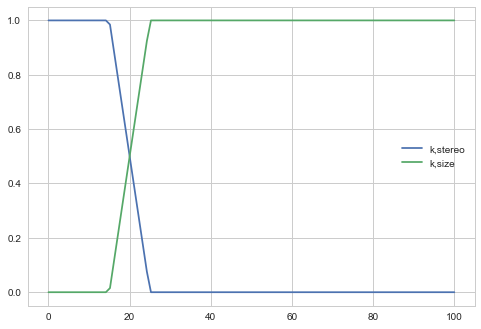

In [94]:
plt.plot(estimated_distances, k_stereo, label="k,stereo")
plt.plot(estimated_distances, k_size, label="k,size")
plt.legend()

In [95]:
dstereo = 18.0
dsize = 21.0

In [96]:
d = dstereo*k_stereo+dsize*k_size

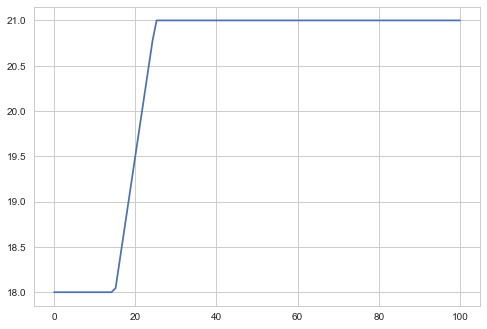

In [97]:
plt.plot(ed,d)